<a href="https://colab.research.google.com/github/eunhyechoe/psyc60/blob/main/1_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Visualization**
Plot time-series, response patterns, and functional connectivity profiles

### 1. Setup environment for Colab

Colab's virtual environment is temporary, so you need to install any non-default packages each time you run the script. Run the following cell first to set up the environment.

In [1]:
# cell 1
# start and install neuroboros
%%capture
%pip install -U neuroboros hyperalignment

UsageError: Line magic function `%%capture` not found.


### 2. Import Libraries
Colab comes with pre-installed packages like `numpy` and `matplotlib`, so you can import them without installation. We also import `neuroboros` under the simplified alias `nb` for convenience.

In [2]:
# cell 2
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, cdist, squareform
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

import neuroboros as nb

### 3. Define dataset

We will load the [StudyForrest](https://www.studyforrest.org/) data in `numpy` format using the `neuroboros` package. For detailed explanations of the code, refer to the [Neuroboros](https://neuroboros.github.io/tutorials/neuroimaging_data_matrix.html) tutorial.

In [3]:
# cell 3
# define dataset
dset = nb.Forrest()
sids = dset.subjects
type(sids), len(sids)

(list, 15)

In [4]:
sids[:3]

['01', '02', '03']

### 4. Load the data
We set the first subject ID of the list to `sid`, and get the data as `dm` for the following parameters.

In [5]:
# cell 4
# upload data (one right hemisphere for one run)
sid = sids[0]
dm = dset.get_data(sid, 'forrest', 1, 'r')
# (subject id, 'dataset', run, 'hemisphere')

In [6]:
type(dm), dm.dtype

(numpy.ndarray, dtype('float64'))

In [7]:
dm.shape

(451, 9666)

### 5. Plot Time-series
Each row of the data represents the time points (TR), and the columns correspond to the cortical vertices (9675). You can plot a response time series of a cortical vertex. Here, we can plot one for the first vertex index.

Text(0.5, 1.0, 'FFA center vertex')

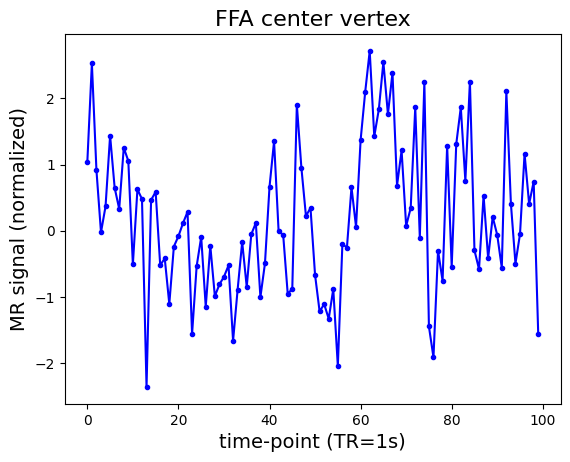

In [8]:
# cell 5
# plot line graph of time series
## FFA center vertex is 6579 in ico32 and 262 in ico8
time_series1 = dm[100:200,6579]
plt.plot(time_series1, "b.-")
plt.xlabel("time-point (TR=1s)", fontsize=14)
plt.ylabel("MR signal (normalized)", fontsize =14)
plt.title("FFA center vertex", fontsize=16)

In [9]:
#fig, ax = plt.subplots(1, 1, figsize=(4, 1), dpi=200)
#ax.plot(dm[:, 0])
#ax.set_xlabel('Time points (TR)')
#plt.show()

## 6. Plot Response Pattern
You can also check the spatial response pattern for a specific time point, for example, TR = 47.

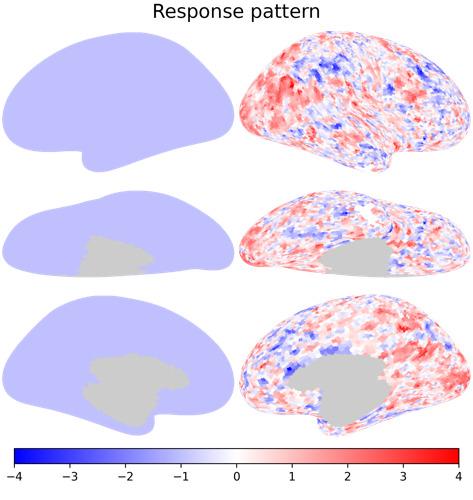

In [10]:
# cell 6
# plot an image of responses

# make blank files of the proper length for left and right hemispheres
lh_zero = np.zeros((9675))
rh_zero = np.zeros((9666))
lh_minus_one = np.zeros((9675))-1
rh_minus_one = np.zeros((9666))-1

# plot image of one timepoint
nb.plot([lh_minus_one, dm[47,:]],
        cmap='bwr', vmax=4, vmin=-4, title='Response pattern')

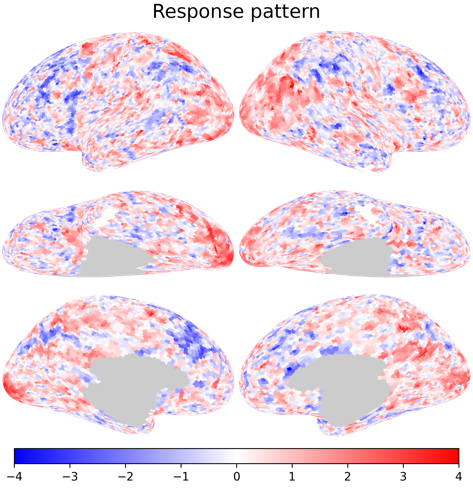

In [11]:
# OR you can load the left hemisphere data
nb.plot([dset.get_data(sid, 'forrest', 1, 'l')[47,:], dm[47,:]],
      cmap='bwr', vmax=4, vmin=-4, title='Response pattern')

### 7. Import searchlight indices

The brain has a complex 3D structure. This can be simplified by representing its surface as a mesh of small triangles. Using the `nb.sls` function, you can extract coordinates from a spherical region on this surface mesh.

`nb.sls` returns the vertex indices for each searchlight as a list of `numpy` arrays. In this step, you will focus on the right hemisphere with a 20 mm radius, using the `onavg` (OpenNeuro Average) template at ico8 resolution.

In [12]:
# cell 7
# import searchlight indices
## rh, radii = 10, 15, and 20 mm
SLS_ico8_10mm_rh = nb.sls('r', 10, space='onavg-ico32', center_space='onavg-ico8', return_dists=False)
SLS_ico8_15mm_rh = nb.sls('r', 15, space='onavg-ico32', center_space='onavg-ico8', return_dists=False)
SLS_ico8_20mm_rh, Dists_ico8_20mm_rh = nb.sls('r', 20, space='onavg-ico32', center_space='onavg-ico8', return_dists=True)

In [13]:
SLS_ico8_15mm_rh[0]

array([2525, 2288, 1652, 3359,  612, 2702, 9038,  834, 5731, 3319, 1204,
       9134, 7832, 3580, 7226, 6084, 6216, 6463,  559, 3358, 2458, 8225,
       9526, 6386, 8083, 6425, 9562,  543, 1496, 3221, 4587, 8871, 2832,
        261, 1199, 4456, 2622,  457, 2580, 4717, 2094,  477, 5238, 6443,
       3809, 8748, 5673,  951,  632, 3115, 6588, 6449, 5239, 4947, 2763,
       8649, 5864, 1084, 7738, 7697, 3902, 1896, 7597, 7803, 8342])

In [14]:
len(SLS_ico8_20mm_rh)

607

In [15]:
SLS_ico8_20mm_rh[0]

array([2525, 2288, 1652, 3359,  612, 2702, 9038,  834, 5731, 3319, 1204,
       9134, 7832, 3580, 7226, 6084, 6216, 6463,  559, 3358, 2458, 8225,
       9526, 6386, 8083, 6425, 9562,  543, 1496, 3221, 4587, 8871, 2832,
        261, 1199, 4456, 2622,  457, 2580, 4717, 2094,  477, 5238, 6443,
       3809, 8748, 5673,  951,  632, 3115, 6588, 6449, 5239, 4947, 2763,
       8649, 5864, 1084, 7738, 7697, 3902, 1896, 7597, 7803, 8342, 4031,
       3755, 2816, 5293, 3266, 8072, 8900, 4980, 4062, 1135, 6240, 1643,
       7081, 3043, 4278,  828, 5368, 6082, 4089, 7420, 9470, 2402, 5182,
       7804, 1875,  847, 2829, 2605, 8192, 7133, 6826, 3837, 1289, 7688,
       1870, 3638,  931, 2501,  734, 6857, 3608, 6460, 1285, 5462, 6866,
       7732, 4137, 8624, 4448, 8875, 7433, 5081, 2203, 6698, 7878])

In [16]:
Dists_ico8_20mm_rh[0]

array([ 1.48304748,  2.61258366,  3.10141759,  3.79217634,  4.28802939,
        4.66836696,  5.00587528,  5.06798309,  5.78989275,  6.0200985 ,
        6.30125702,  6.52689231,  7.13159626,  7.22800534,  7.6159596 ,
        7.7545429 ,  7.82747705,  7.89624676,  8.30505792,  8.9456715 ,
        9.01621693,  9.01687952,  9.06264802,  9.30359958,  9.34427125,
        9.39392963,  9.70150306, 10.09029469, 10.09837002, 10.09868217,
       10.46477979, 10.61984395, 10.68497179, 10.79628171, 10.9601238 ,
       11.26284889, 11.29768772, 11.66229336, 11.77852963, 11.8703167 ,
       11.89513777, 11.99629971, 12.25345858, 12.32949468, 12.35896225,
       12.50638884, 12.6020951 , 12.64712111, 13.02348511, 13.51964008,
       13.57076944, 13.57143343, 13.63020304, 13.63695249, 13.72485909,
       13.92477888, 14.04287915, 14.05583613, 14.07672766, 14.11625699,
       14.25560668, 14.33358632, 14.35914417, 14.44420532, 14.98008685,
       15.02910766, 15.17206928, 15.35882542, 15.38019842, 15.41

### 8. Plot Responses in One Searchlight
We can plot response patterns for one ico8 searchlight (262 for FFA).

In [18]:
type(SLS_ico8_20mm_rh), len(SLS_ico8_20mm_rh)

(list, 607)

In [20]:
type(SLS_ico8_20mm_rh[262]), len(SLS_ico8_20mm_rh[262])

(numpy.ndarray, 125)

The ico8 searchlight for right FFA (radius = 20 mm) has 125 vertex indices.

In [21]:
SLS_ico8_20mm_rh[262]

array([6579, 5046, 2891, 2069, 4324, 2188, 7195, 2597, 4337, 4872,  406,
       9215, 4559, 6360, 4141, 1662, 9048, 6314, 5789, 2874, 1635, 6850,
       2691, 2884, 7741, 7662, 1879, 6519,  755, 8054, 5313, 5010, 2947,
       9250, 9465, 2930, 3209, 3371, 6942, 8482, 4354, 1438, 2228, 8246,
       8654, 8879, 8722, 5564, 8753, 3417, 5341, 5934, 1150, 1794, 3924,
       6110, 7088, 1703, 1806,  750, 8768, 2759, 1612, 9227, 3872, 4282,
       5170, 4059, 7942, 7148, 6168, 2954, 5979, 5272, 7584, 6121, 3794,
       4225, 3600,  193, 4474, 2628, 5811, 5224, 1190,  351, 1024, 6975,
       7836, 3085, 6321, 1291, 3606, 6212, 3219,  181, 4247, 8163, 1494,
       7824,  264, 7772, 8511, 1501, 4163, 7723, 1081, 4968, 6925, 2630,
       4911, 3643,  437, 9423, 6921, 3031, 8299, 2560, 4914, 8617, 7491,
       9200, 7353, 6593,    8])

We can extract the data for the right FFA searchlight.

In [23]:
sl_dm = dm[:, SLS_ico8_20mm_rh[262]]
sl_dm.shape

(451, 125)

125

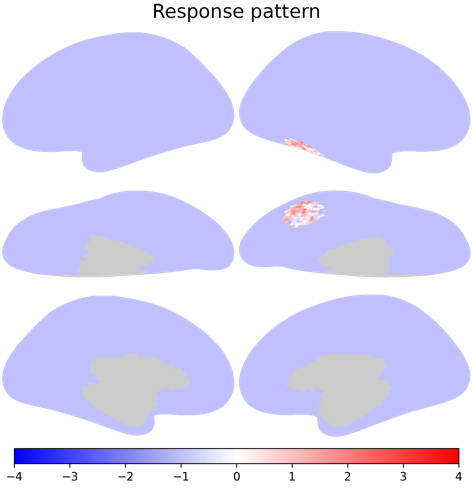

In [34]:
# cell 8
# plot responses in one searchlight (right FFA) for time-point 47
sl = 262 # right FFA
tp = 47

rh_minus_one = np.zeros((9666))-1
rh_sl = rh_minus_one

for vtx in range(len(SLS_ico8_20mm_rh[sl])):
  rh_sl[SLS_ico8_20mm_rh[sl][vtx]] = dm[tp,SLS_ico8_20mm_rh[sl][vtx]]

nb.plot([lh_minus_one, rh_sl], cmap='bwr', vmax=4, vmin=-4, title='Response pattern')

## 6. Funcional Connectivity Profile

We can also quantify how brain regions are synchronized in time series by computing functional connectivity between two vertices using the Pearson correlation along the time series.

In [35]:
dm.shape

(451, 9666)

To simplify the calculation, we downsample the data matrix from ico32 resolution to ico8 resolution.

In [40]:
xfm = nb.mapping('r', 'onavg-ico32', 'onavg-ico8', mask=True)
xfm.shape

In [43]:
dm_ico32 = dm
dm_ico8 = dm_ico32 @ xfm

In [44]:
print(dm_ico32.shape, xfm.shape, dm_ico8.shape)

(451, 9666) (9666, 607) (451, 607)


Now the data consist of a total of 603 vertices. By calculating the correlation along the time series for all pairs of vertices, we can generate the connectivity matrix.

In [45]:
d = pdist(dm_ico8.T, 'correlation')
mat = 1 - squareform(d)
print(d.shape, mat.shape)

(183921,) (607, 607)


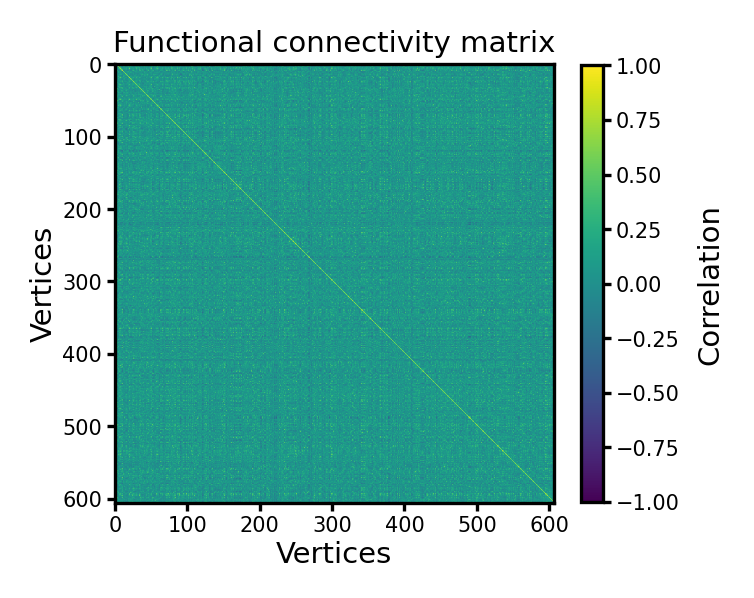

In [46]:
fig, ax = plt.subplots(1, 1, figsize=[_/2.54 for _ in [6, 6]], dpi=300)
im = ax.imshow(mat, vmax=1, vmin=-1, cmap='viridis')

ax.set_title('Functional connectivity matrix', size=7, pad=3)
ax.tick_params('both', labelsize=5, size=2, pad=1)
ax.set_xlabel('Vertices', size=7, labelpad=1)
ax.set_ylabel('Vertices', size=7, labelpad=1)
cb = fig.colorbar(im, ax=ax, shrink=0.8)
cb.ax.tick_params(labelsize=5, size=2, pad=1)
cb.ax.set_ylabel('Correlation', size=7)
plt.show()